In [72]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gbif_r = pd.read_csv('gbif_r.csv')

In [ ]:
plt.figure(figsize = (13,3))
sns.kdeplot(x = gbif_r.year, color = 'r');

In [ ]:
plt.figure(figsize = (15,12))
plot_order = sns.histplot(y = gbif_r.region, 
                          hue = gbif_r.order,
                           multiple = "fill",
                         palette = 'Paired');

plot_order.set_title('Bird distribution by order and regions')
plot_order.set(xlabel = 'Order', 
                ylabel='Region');

a = gbif_r.groupby(['observations', 'year'], as_index = False)['species']

dfa = pd.DataFrame(data = a)
dfa

b = gbif_r.groupby(['species','year'], as_index = False)['lat'].sum()
dfb = pd.DataFrame(b)
dfb

# 
years_list = gbif_r.year.unique()
def funcion(years_list):
    for y in years_list:
        if gbif_r.year == y:
            mean1 = gbif_r.groupby(['species'])['lat'].mean
        else: 
            print('there is an error')
    return mean1

y20 = gbif_r[gbif_r['year'] == 2020]
y19 = gbif_r[gbif_r['year'] == 2019]
y18 = gbif_r[gbif_r['year'] == 2018]
y17 = gbif_r[gbif_r['year'] == 2017]
y16 = gbif_r[gbif_r['year'] == 2016]
y15 = gbif_r[gbif_r['year'] == 2015]
y14 = gbif_r[gbif_r['year'] == 2014]
y13 = gbif_r[gbif_r['year'] == 2013]
y12 = gbif_r[gbif_r['year'] == 2012]
y11 = gbif_r[gbif_r['year'] == 2011]
y10 = gbif_r[gbif_r['year'] == 2010]
y09 = gbif_r[gbif_r['year'] == 2009]
y08 = gbif_r[gbif_r['year'] == 2008]
y07 = gbif_r[gbif_r['year'] == 2007]
y06 = gbif_r[gbif_r['year'] == 2006]
y05 = gbif_r[gbif_r['year'] == 2005]
y04 = gbif_r[gbif_r['year'] == 2004]
y03 = gbif_r[gbif_r['year'] == 2003]
y02 = gbif_r[gbif_r['year'] == 2002]
y01 = gbif_r[gbif_r['year'] == 2001]

year_list = [y20, y19, y18, y17, y16, y15, y14, y13, y12, y11, y10, y09, y08, y07, y06, y05, y04, y03, y02, y01]


In [36]:
# for y in year_list
#   y['latlong'] = y['lat'].astype(str) + ', ' + y['long'].astype(str)

<ipython-input-36-06da3bc82506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['latlong'] = y['lat'].astype(str) + ', ' + y['long'].astype(str)


In [83]:
# New dataframe with the lat-long mean and median per year and specie
dif = pd.DataFrame(gbif_r.groupby(['year', 'species'])['lat'].mean())
dif = dif.rename(columns = {'lat': 'lat_mean'})
dif['long_mean'] = gbif_r.groupby(['year', 'species'])['long'].mean()
dif['long_med'] = gbif_r.groupby(['year', 'species'])['long'].median()
dif['lat_med'] = gbif_r.groupby(['year', 'species'])['lat'].median()
dif['regions'] = gbif_r.groupby(['year', 'species'])['region'].agg(lambda x:x.value_counts().index[0])

dif.reset_index(inplace = True)  

dif

,year,species,lat_mean,long_mean,long_med,lat_med,regions
0,2001,Accipiter gentilis,41.475405,-3.764305,-4.621390,41.910837,Castilla y León
1,2001,Accipiter nisus,40.340947,-4.042108,-4.867379,41.369110,Extremadura
2,2001,Acrocephalus arundinaceus,41.010709,-3.688138,-4.752939,42.067673,Castilla y León
3,2001,Acrocephalus melanopogon,40.521891,2.150216,3.105440,40.540875,Cataluña
4,2001,Acrocephalus paludicola,41.894325,-4.745975,-4.752939,42.067673,Castilla y León
...,...,...,...,...,...,...,...
8765,2020,Uria aalge,43.424461,-3.819587,-3.462010,43.420030,País Vasco
8766,2020,Vanellus gregarius,39.886925,-4.772777,-5.954113,39.560776,Extremadura
8767,2020,Vanellus vanellus,40.332819,-3.799163,-4.752939,40.173980,Extremadura
8768,2020,Xema sabini,43.200982,-6.730901,-7.677165,43.414082,Galicia


In [ ]:
funcion que compare de cada especie-año la long /lat ... y me devuelva una lista de
aquellas especies que tengan una diferencia de valor mayor a X 
o que me ordene la diferencia de valor encontrada, y yo hacer un sort y trabajar con las mayores diferencias


# nombrecolumna = list(dif.columns)
species = list(dif.species.unique()) 
def compare(columnname, startyear, endyear):
    lista = []
    for s in species:
        a = dif.loc[(dif['species'] == s) & (dif['year'] == startyear)]
        b = dif.loc[(dif['species'] == s) & (dif['year'] == endyear)]
        c = b - a
        lista.append({s: c})
        
    return lista 

# buscar los valores más altos. ABS!!! 

In [96]:
# nombrecolumna = list(dif.columns)
species = list(dif.species.unique()) 
def compare(columnname, startyear, endyear):
    lista = []
    for s in species:
        a = dif.loc[(dif['species'] == s) & (dif['year'] == startyear)][columnname]
        b = dif.loc[(dif['species'] == s) & (dif['year'] == endyear)][columnname]
        c = b - a
        lista.append({s: c})
        
    return lista 

# buscar los valores más altos. ABS!!! 

In [145]:
# nombrecolumna = list(dif.columns)
species = list(dif.species.unique()) 
def compare(columnname, startyear, endyear):
    lista = {}
    for s in species:
        a = dif.loc[[(dif['species'] == s) & (dif['year'] == startyear)]]
        b = dif.loc[[(dif['species'] == s) & (dif['year'] == endyear)]]
        c = float(b.columnname) - float(a.columnname)
        lista.append({s: c})
        
    return lista

# buscar los valores más altos. ABS!!! 

In [146]:
compare(columnname = dif.lat_mean, 
        startyear = 2001, 
        endyear = 2020)

ValueError: PandasArray must be 1-dimensional.

In [141]:
d = {} 
a = dif.loc[(dif['species'] == 'Uria aalge') & (dif['year'] == 2020)]
b = dif.loc[(dif['species'] == 'Uria aalge') & (dif['year'] == 2001)]
c = float(a.lat_mean) - float(b.lat_mean)
d.append({'x': c})
d

AttributeError: 'dict' object has no attribute 'append'

In [126]:
c = float(a.lat_mean) - float(b.lat_mean)
c

-0.059705406765274915

In [101]:
compare(columnname = dif.lat_mean, startyear = 2001, endyear = 2020)

KeyError: "None of [Index([(True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...), (41.47540472580645, 40.340946558139514, 41.01070908571421, 40.5218909, 41.894325032258074, 41.451402638554214, 41.18763789542477, 39.27916388260868, 40.63373492771084, 42.64497566666667, 39.93886252173912, 42.639484, 38.607784, 39.60770719298242, 42.70683598245615, 40.65768071195652, 28.445152500000003, 39.76453841666667, 43.293175, 42.22567, 40.01365716666667, 41.00172955128206, 42.700455000000005, 40.15340325607062, 40.324160355742244, 40.13502182101162, 41.08817855509795, 40.98357714084505, 40.2212053039215, 42.32348212, 41.58290981060596, 42.860177, 41.910837, 42.260609, 41.857594, 41.840794, 28.199537863157897, 40.96995270588235, 41.872684, 43.50159433333334, 40.67471903191486, 42.61654466666666, 41.95041270930233, 41.732694397058815, 40.732904448377575, 38.92681177777778, 40.75320669387753, 37.841946203125, 28.175583055555567, 38.958224711111114, 41.35996542105263, 39.602034461538445, 40.72799148, 40.24916778270274, 40.273004519337015, 38.90298835820895, 37.61897310526315, 40.85224035714287, 41.0076057368421, 40.071777980769234, 43.318684, 42.57289691666667, 40.558048825714245, 39.07173378823531, 43.233583, 40.270243176470586, 42.29825062500001, 43.39696545454546, 41.845594000000006, 41.81951868, 41.842660666666674, 40.818851810810806, 39.83577918399997, 29.511423192307692, 43.115522999999996, 28.1660464, 39.7319401011236, 40.53539134833659, 36.635277, 39.35163737254903, 33.448648500000004, 37.77808538016529, 40.332806920127766, 37.20378127659574, 40.141668393939405, 43.450777, 40.68270990909091, 40.07836008450706, 40.712298733333334, 37.33971253164557, 41.479756409090896, 38.48630813043478, 40.08262354742092, 41.914211968749996, 39.418087964497055, 42.111523, 40.20964727488151, 42.77531645454545, 40.78543012647054, 37.784898924657554, ...)], dtype='object')] are in the [index]"

In [ ]:
for s in species:
    if region en el año X != region en el año Y:
        lista.append(s)
    else: 
        pass 

    # por cada especie los valores únicos, y si len != 1, return specie

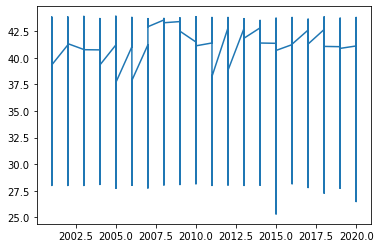

In [81]:
plt.scatter(average.year,
        average.lat_mean,
           hue = average.)
plt.show()

In [64]:
average.columns

Index(['lat_mean', 'long_mean', 'long_med', 'lat_med'], dtype='object')

In [46]:
for y in year_list:
    data = pd.DataFrame(y.groupby(['species'])['lat'].mean())

    
#buscar el modo de incluirlas en el dataframe cambiando el nombre
# hacer lo mismo para long
#for i, df in enumerate(year_list, 1):
 #   df.columns = [col_name+'_df{}'.format(i) for col_name in df.columns]
    

KeyError: 'species'

In [ ]:
# revisar

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi = dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df = gbif_r, 
        x = gbif_r.date, 
        y = gbif_r.observations, 
        title = 'Bird ')    

In [ ]:
#  Usar Poisson para describir el número de ocurrencias en un determinado espacio de tiempo